# An√°lisis Num√©rico del Atractor de Lorenz: Implementaci√≥n de M√©todos Num√©ricos

## Introducci√≥n a los M√©todos Num√©ricos para Ecuaciones Diferenciales

En este proyecto implementaremos dos m√©todos num√©ricos fundamentales para resolver sistemas de ecuaciones diferenciales ordinarias: el **m√©todo de Euler** y el **m√©todo de Runge-Kutta de cuarto orden (RK4)**. Estos m√©todos nos permitir√°n simular el comportamiento del famoso sistema de Lorenz, un modelo cl√°sico de caos determinista.


## M√©todo de Euler

El m√©todo de Euler, desarrollado por Leonhard Euler en el siglo XVIII, es el m√©todo num√©rico m√°s simple para aproximar soluciones de ecuaciones diferenciales ordinarias. Se basa en la idea de aproximar la soluci√≥n mediante una serie de pasos discretos.

Para un sistema de ecuaciones diferenciales de la forma:

$$
\frac{dx}{dt} = F(x, t)
$$

El m√©todo de Euler se implementa como:

$$
x_{n+1} = x_n + h \cdot F(x_n, t_n)
$$

donde:

\begin{aligned}
    &h &&\text{: tama√±o del paso temporal} \\
    &x_n &&\text{: aproximaci√≥n actual} \\
    &x_{n+1} &&\text{: siguiente aproximaci√≥n}
\end{aligned}


**Ventajas:**

- Sencillez conceptual y de implementaci√≥n  
- Bajo costo computacional por paso  

**Desventajas:**

- Baja precisi√≥n (error de truncamiento local $O(h^2)$)
- Puede volverse inestable para pasos grandes


## M√©todo de Runge-Kutta de Cuarto Orden (RK4)

El m√©todo RK4, desarrollado por Carl Runge y Martin Kutta alrededor de 1900, es uno de los m√°s populares debido a su equilibrio entre precisi√≥n y eficiencia.

Para el mismo sistema:

$$\frac{dx}{dt} = F(x, t)$$

El m√©todo RK4 se implementa como:


\begin{aligned}
k_1 &= h \cdot F(x_n, t_n) \\
k_2 &= h \cdot F\left(x_n + \frac{k_1}{2}, t_n + \frac{h}{2}\right) \\
k_3 &= h \cdot F\left(x_n + \frac{k_2}{2}, t_n + \frac{h}{2}\right) \\
k_4 &= h \cdot F(x_n + k_3, t_n + h) \\
x_{n+1} &= x_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}


**Ventajas:**
- Mayor precisi√≥n (error de truncamiento local $O(h^5)$)  
- Mayor estabilidad que Euler  
- Ampliamente utilizado en aplicaciones cient√≠ficas

**Desventajas:**

- Mayor costo computacional por paso (4 evaluaciones por paso)  
- Implementaci√≥n ligeramente m√°s compleja


## Implementaci√≥n de los M√©todos para el Sistema de Lorenz

El sistema de Lorenz est√° dado por:

\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}

Implementaremos ambos m√©todos para resolver este sistema bajo diferentes condiciones iniciales y par√°metros.




In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

### Implementaci√≥n del M√©todo de Euler

In [14]:
def euler_method(f, x0, t_range, h):
    """
    Implementaci√≥n del m√©todo de Euler para sistemas de EDOs
    
    Par√°metros:
    f: funci√≥n que define el sistema de EDOs (debe devolver un array)
    x0: condiciones iniciales (array)
    t_range: tupla (t_inicial, t_final)
    h: tama√±o del paso
    
    Retorna:
    t: array de tiempos
    x: array de soluciones (cada fila es un paso temporal)
    """
    t0, tf = t_range
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    x = np.zeros((n_steps + 1, len(x0)))
    x[0] = x0
    
    for i in range(n_steps):
        x[i+1] = x[i] + h * f(x[i], t[i])
    
    return t, x

### Implementaci√≥n del M√©todo RK4

In [15]:
def rk4_method(f, x0, t_range, h):
    """
    Implementaci√≥n del m√©todo RK4 para sistemas de EDOs
    
    Par√°metros:
    f: funci√≥n que define el sistema de EDOs (debe devolver un array)
    x0: condiciones iniciales (array)
    t_range: tupla (t_inicial, t_final)
    h: tama√±o del paso
    
    Retorna:
    t: array de tiempos
    x: array de soluciones (cada fila es un paso temporal)
    """
    t0, tf = t_range
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    x = np.zeros((n_steps + 1, len(x0)))
    x[0] = x0
    
    for i in range(n_steps):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2 * k1, t[i] + h/2)
        k3 = f(x[i] + h/2 * k2, t[i] + h/2)
        k4 = f(x[i] + h * k3, t[i] + h)
        
        x[i+1] = x[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return t, x

### Funci√≥n para el Sistema de Lorenz

In [13]:
def lorenz_system(x, t, sigma=10, rho=28, beta=8/3):
    """
    Define el sistema de ecuaciones de Lorenz
    
    Par√°metros:
    x: array con las variables de estado [x, y, z]
    t: tiempo (no se usa expl√≠citamente en ecuaciones aut√≥nomas)
    sigma, rho, beta: par√°metros del sistema
    
    Retorna:
    Array con las derivadas [dx/dt, dy/dt, dz/dt]
    """
    dxdt = sigma * (x[1] - x[0])
    dydt = x[0] * (rho - x[2]) - x[1]
    dzdt = x[0] * x[1] - beta * x[2]
    return np.array([dxdt, dydt, dzdt])


## Simulaciones del Atractor de Lorenz

Realizaremos simulaciones para tres conjuntos diferentes de condiciones iniciales y par√°metros.

### Caso 1: Par√°metros cl√°sicos, condiciones iniciales sim√©tricas

In [19]:
# Par√°metros y condiciones iniciales
sigma1, rho1, beta1 = 10, 28, 8/3
x0_1 = np.array([1.0, 1.0, 1.0])

# Configuraci√≥n de la simulaci√≥n
t_range = (0, 50)
h = 0.01

# Resolver con ambos m√©todos
t_euler1, sol_euler1 = euler_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                                   x0_1, t_range, h)
t_rk41, sol_rk41 = rk4_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                             x0_1, t_range, h)

### Visualizaci√≥n de resultados para Caso 1

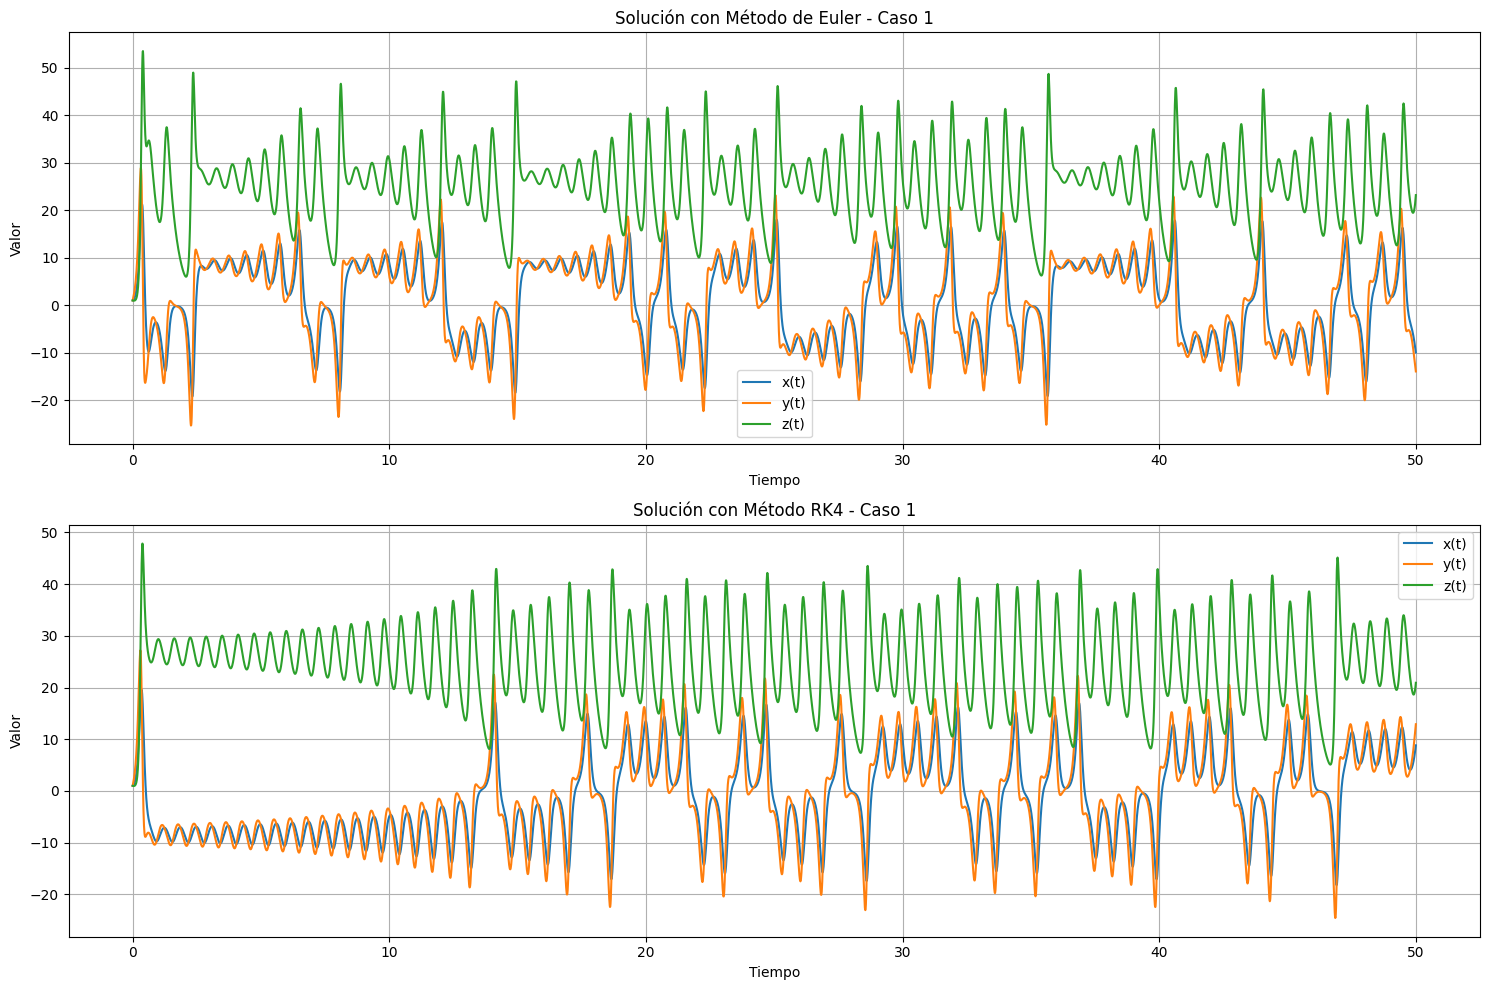

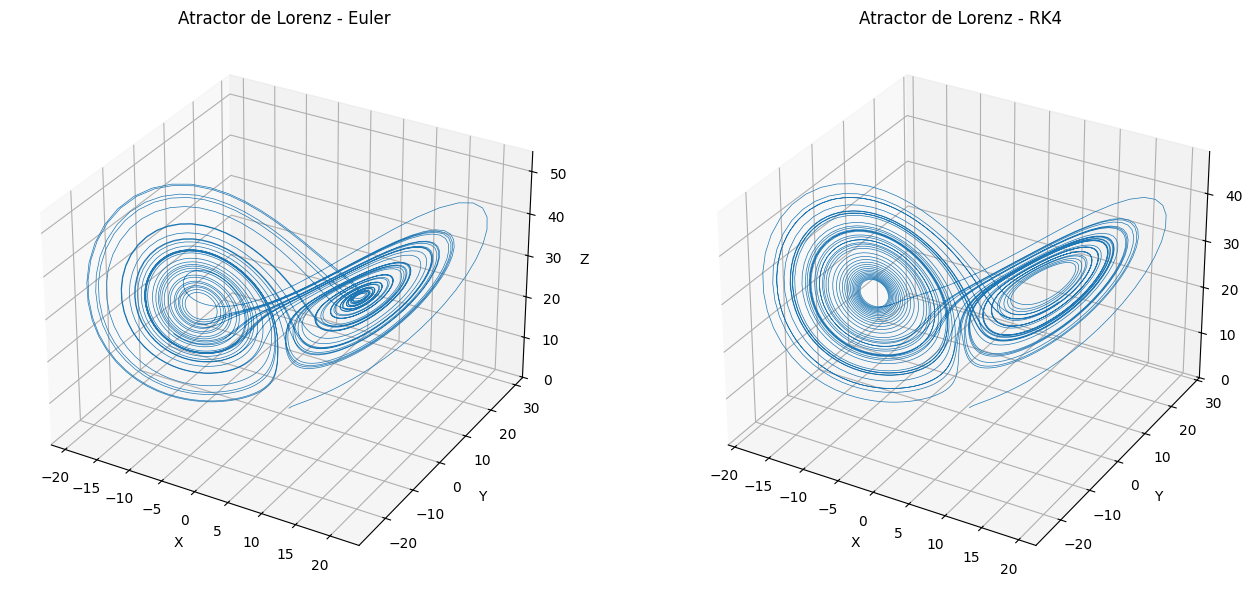

In [20]:
# Gr√°ficas de las componentes vs tiempo
plt.figure(figsize=(15, 10))

# M√©todo de Euler
plt.subplot(2, 1, 1)
plt.plot(t_euler1, sol_euler1[:, 0], label='x(t)')
plt.plot(t_euler1, sol_euler1[:, 1], label='y(t)')
plt.plot(t_euler1, sol_euler1[:, 2], label='z(t)')
plt.title('Soluci√≥n con M√©todo de Euler - Caso 1')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# M√©todo RK4
plt.subplot(2, 1, 2)
plt.plot(t_rk41, sol_rk41[:, 0], label='x(t)')
plt.plot(t_rk41, sol_rk41[:, 1], label='y(t)')
plt.plot(t_rk41, sol_rk41[:, 2], label='z(t)')
plt.title('Soluci√≥n con M√©todo RK4 - Caso 1')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gr√°fica 3D del atractor
fig = plt.figure(figsize=(14, 6))

# Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_euler1[:, 0], sol_euler1[:, 1], sol_euler1[:, 2], lw=0.5)
ax1.set_title('Atractor de Lorenz - Euler')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_rk41[:, 0], sol_rk41[:, 1], sol_rk41[:, 2], lw=0.5)
ax2.set_title('Atractor de Lorenz - RK4')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

### Caso 2: Par√°metros cl√°sicos, condiciones iniciales asim√©tricas

In [21]:
# Condiciones iniciales diferentes
x0_2 = np.array([1.002025, 0.2, 0.4])

# Resolver con ambos m√©todos
t_euler2, sol_euler2 = euler_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                                   x0_2, t_range, h)
t_rk42, sol_rk42 = rk4_method(lambda x, t: lorenz_system(x, t, sigma1, rho1, beta1), 
                             x0_2, t_range, h)

### Visualizaci√≥n de resultados para Caso 2

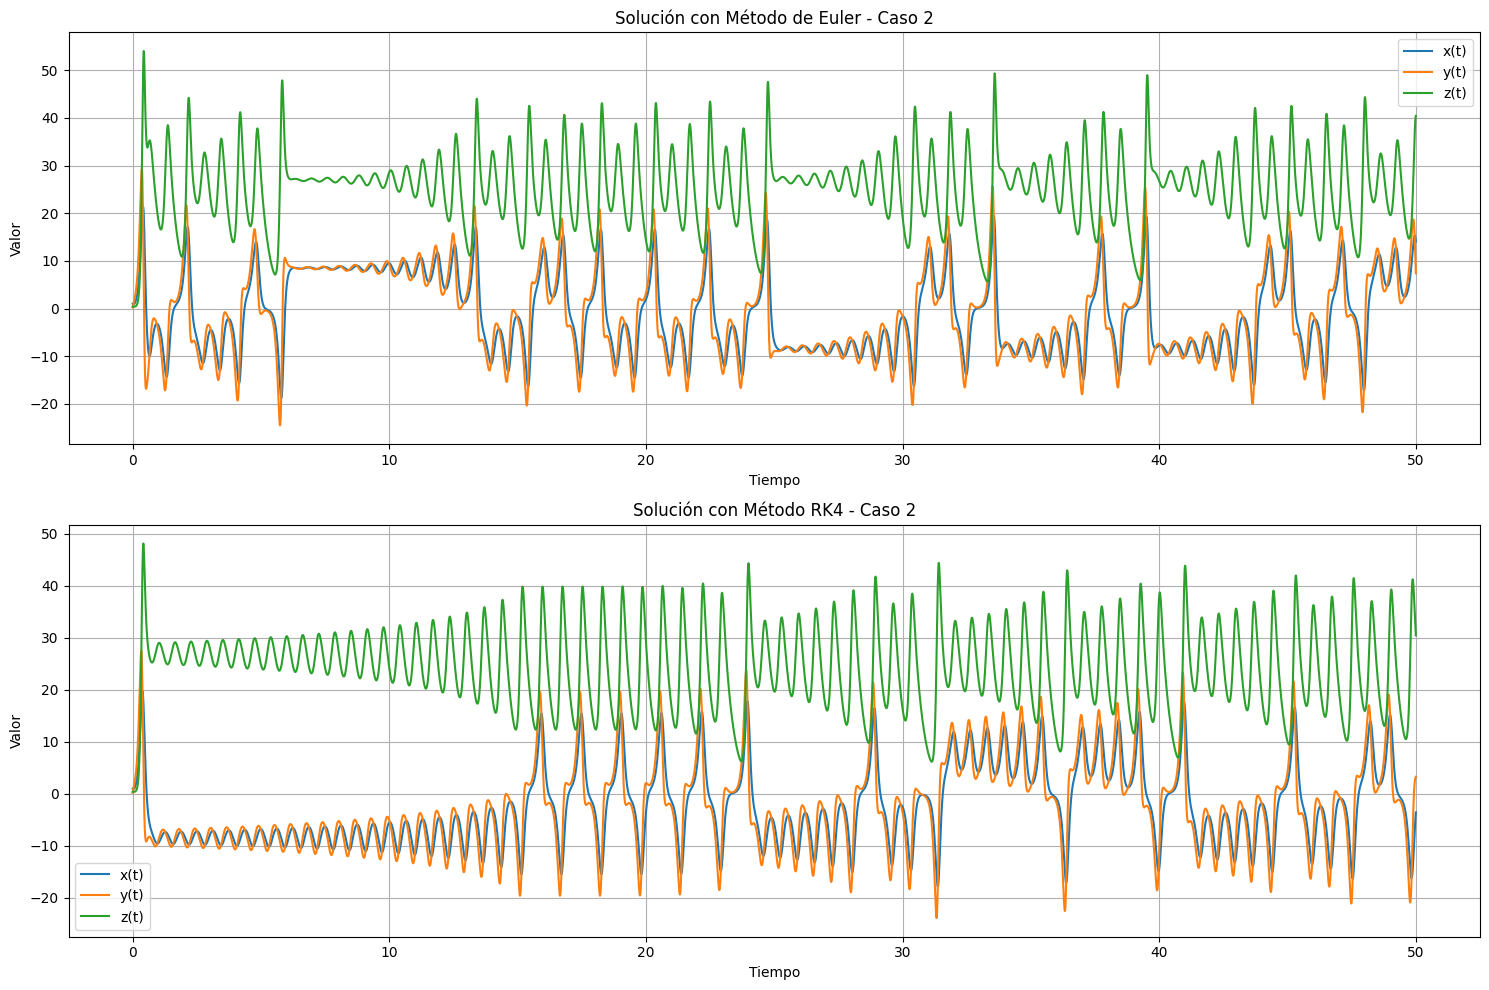

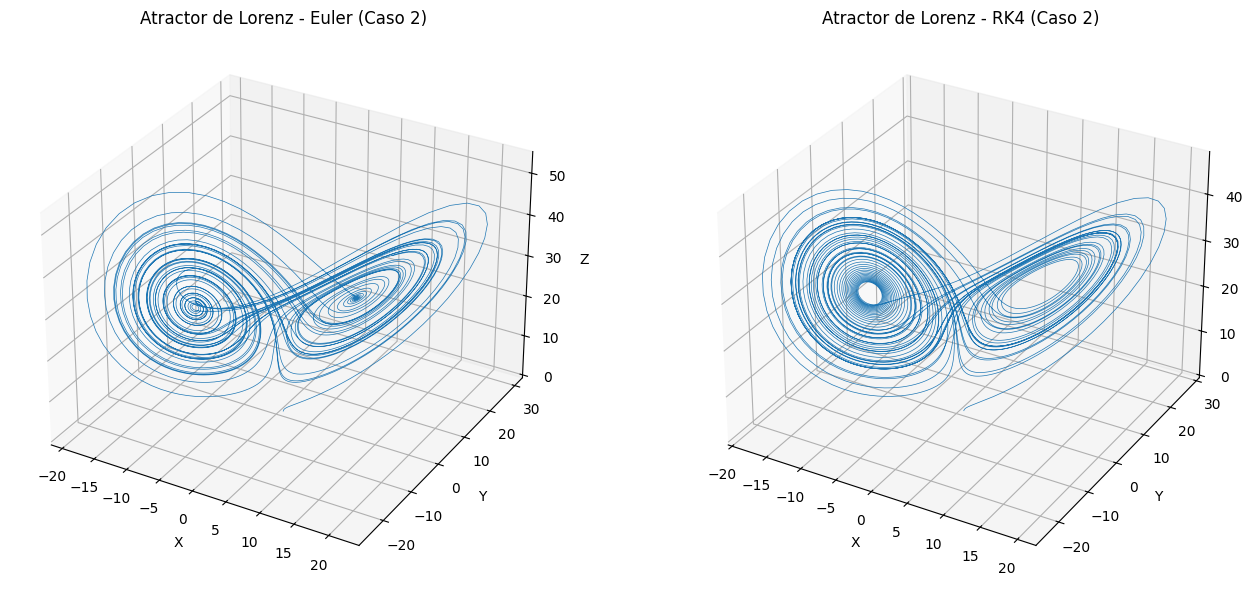

In [22]:
# Gr√°ficas de las componentes vs tiempo
plt.figure(figsize=(15, 10))

# M√©todo de Euler
plt.subplot(2, 1, 1)
plt.plot(t_euler2, sol_euler2[:, 0], label='x(t)')
plt.plot(t_euler2, sol_euler2[:, 1], label='y(t)')
plt.plot(t_euler2, sol_euler2[:, 2], label='z(t)')
plt.title('Soluci√≥n con M√©todo de Euler - Caso 2')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# M√©todo RK4
plt.subplot(2, 1, 2)
plt.plot(t_rk42, sol_rk42[:, 0], label='x(t)')
plt.plot(t_rk42, sol_rk42[:, 1], label='y(t)')
plt.plot(t_rk42, sol_rk42[:, 2], label='z(t)')
plt.title('Soluci√≥n con M√©todo RK4 - Caso 2')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gr√°fica 3D del atractor
fig = plt.figure(figsize=(14, 6))

# Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_euler2[:, 0], sol_euler2[:, 1], sol_euler2[:, 2], lw=0.5)
ax1.set_title('Atractor de Lorenz - Euler (Caso 2)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_rk42[:, 0], sol_rk42[:, 1], sol_rk42[:, 2], lw=0.5)
ax2.set_title('Atractor de Lorenz - RK4 (Caso 2)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()


### Caso 3: Par√°metros diferentes

In [23]:
# Nuevos par√°metros
sigma3, rho3, beta3 = 9, 18, 10/3
x0_3 = np.array([2.0, 0.009, 0.7])

# Resolver con ambos m√©todos
t_euler3, sol_euler3 = euler_method(lambda x, t: lorenz_system(x, t, sigma3, rho3, beta3), 
                                   x0_3, t_range, h)
t_rk43, sol_rk43 = rk4_method(lambda x, t: lorenz_system(x, t, sigma3, rho3, beta3), 
                             x0_3, t_range, h)

### Visualizaci√≥n de resultados para Caso 3

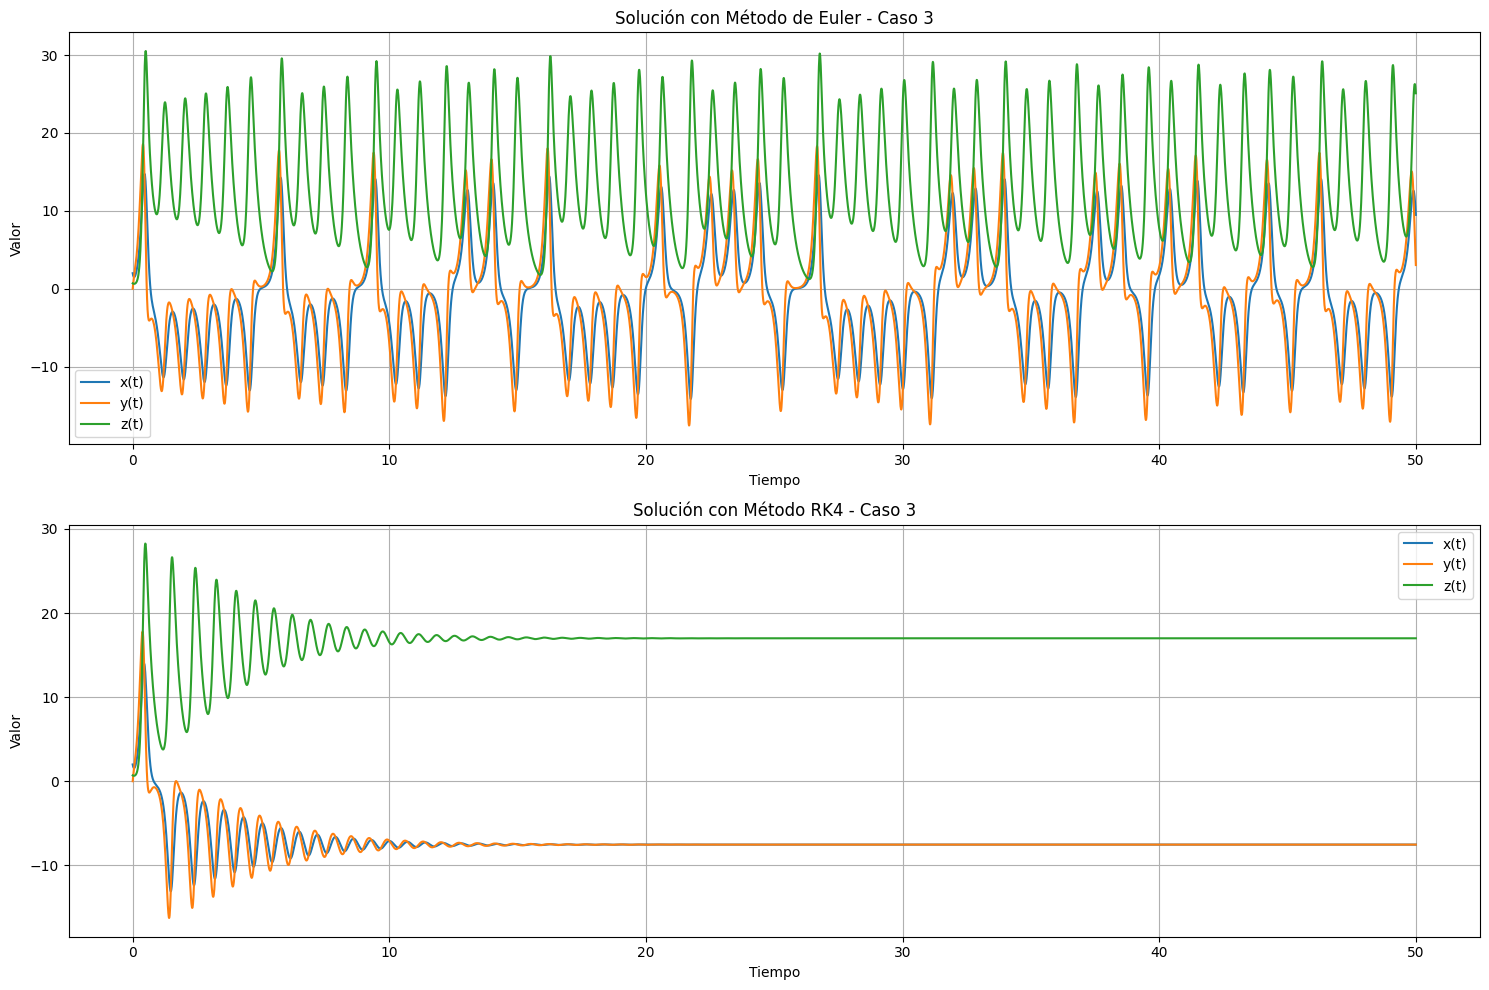

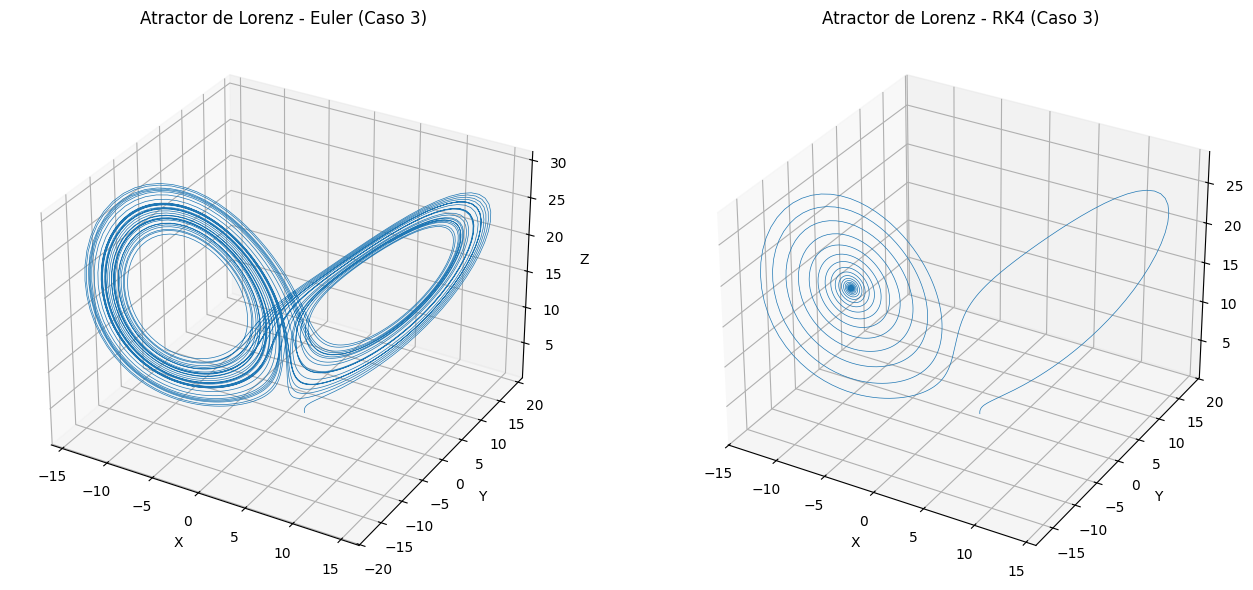

In [24]:
# Gr√°ficas de las componentes vs tiempo
plt.figure(figsize=(15, 10))

# M√©todo de Euler
plt.subplot(2, 1, 1)
plt.plot(t_euler3, sol_euler3[:, 0], label='x(t)')
plt.plot(t_euler3, sol_euler3[:, 1], label='y(t)')
plt.plot(t_euler3, sol_euler3[:, 2], label='z(t)')
plt.title('Soluci√≥n con M√©todo de Euler - Caso 3')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

# M√©todo RK4
plt.subplot(2, 1, 2)
plt.plot(t_rk43, sol_rk43[:, 0], label='x(t)')
plt.plot(t_rk43, sol_rk43[:, 1], label='y(t)')
plt.plot(t_rk43, sol_rk43[:, 2], label='z(t)')
plt.title('Soluci√≥n con M√©todo RK4 - Caso 3')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Gr√°fica 3D del atractor
fig = plt.figure(figsize=(14, 6))

# Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_euler3[:, 0], sol_euler3[:, 1], sol_euler3[:, 2], lw=0.5)
ax1.set_title('Atractor de Lorenz - Euler (Caso 3)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_rk43[:, 0], sol_rk43[:, 1], sol_rk43[:, 2], lw=0.5)
ax2.set_title('Atractor de Lorenz - RK4 (Caso 3)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

## An√°lisis de Resultados

### Efecto de las condiciones iniciales

Al comparar los Casos 1 y 2 (que usan los mismos par√°metros pero diferentes condiciones iniciales), observamos:

1. **Sensibilidad a las condiciones iniciales**: Peque√±os cambios en las condiciones iniciales (Caso 1 vs Caso 2) llevan a trayectorias completamente diferentes despu√©s de un tiempo relativamente corto. Esto es una manifestaci√≥n del comportamiento ca√≥tico del sistema de Lorenz.

2. **Patrones generales**: A pesar de las diferencias en las trayectorias espec√≠ficas, ambos casos muestran la estructura caracter√≠stica del atractor de Lorenz, con las √≥rbitas girando alternativamente alrededor de los dos puntos fijos no triviales.

### Efecto de los par√°metros

Al comparar los Casos 1/2 con el Caso 3 (que usa par√°metros diferentes), observamos:

1. **Comportamiento cualitativo diferente**: Con los par√°metros modificados (œÉ=9, œÅ=18, Œ≤=10/3), el sistema muestra un comportamiento menos ca√≥tico y m√°s peri√≥dico. Las trayectorias tienden a estabilizarse en uno de los puntos fijos en lugar de exhibir el comportamiento ca√≥tico caracter√≠stico.

2. **Estabilidad del sistema**: Los par√°metros cl√°sicos (œÉ=10, œÅ=28, Œ≤=8/3) producen el comportamiento ca√≥tico conocido, mientras que con los par√°metros modificados el sistema parece tender a un comportamiento m√°s estable.

### Comparaci√≥n de los m√©todos num√©ricos

Al comparar los resultados obtenidos con Euler y RK4:

1. **Precisi√≥n**: El m√©todo RK4 produce soluciones m√°s suaves y precisas, especialmente evidente en las gr√°ficas de las componentes vs tiempo. Las soluciones de Euler muestran m√°s "ruido" num√©rico.

2. **Conservaci√≥n de la estructura del atractor**: En las gr√°ficas 3D, el atractor generado por RK4 muestra una estructura m√°s clara y definida, mientras que el de Euler aparece m√°s difuso debido a los errores acumulados.

3. **Estabilidad**: Para pasos de tiempo iguales, RK4 es m√°s estable y puede capturar mejor la din√°mica ca√≥tica del sistema.

## Conclusi√≥n sobre los m√©todos

Para sistemas ca√≥ticos como el atractor de Lorenz, **el m√©todo RK4 es claramente superior al m√©todo de Euler** por varias razones:

1. **Mayor precisi√≥n**: El error de truncamiento local de $O(h^5)$ en RK4 vs $O(h^2)$ en Euler permite capturar mejor la din√°mica compleja del sistema.

2. **Mayor estabilidad**: RK4 es menos propenso a acumular errores que distorsionen la estructura del atractor.

3. **Conservaci√≥n de propiedades cualitativas**: RK4 preserva mejor las caracter√≠sticas cualitativas del sistema, como la estructura fractal del atractor.

Si bien el m√©todo de Euler es m√°s simple y computacionalmente m√°s econ√≥mico por paso, requiere pasos mucho m√°s peque√±os para alcanzar una precisi√≥n comparable, lo que en la pr√°ctica puede hacerlo incluso m√°s costoso que RK4. Para estudios serios de sistemas ca√≥ticos, RK4 es la elecci√≥n recomendada.

### An√°lisis Comparativo de los M√©todos Num√©ricos

En este proyecto se implementaron e integraron dos m√©todos num√©ricos para aproximar el sistema de Lorenz: el **m√©todo de Euler** y el **m√©todo de Runge-Kutta de cuarto orden (RK4)**. Ambos m√©todos fueron evaluados con distintos conjuntos de par√°metros y condiciones iniciales.

#### üîπ Precisi√≥n y Estabilidad

El m√©todo de Euler, aunque sencillo de implementar y con bajo costo computacional por paso, mostr√≥ deficiencias significativas en cuanto a **precisi√≥n** y **estabilidad**. En las gr√°ficas temporales de las variables \(x(t)\), \(y(t)\) y \(z(t)\), se observa que la soluci√≥n generada por Euler tiende a **desviarse progresivamente**, y en algunos casos presenta oscilaciones no f√≠sicas o comportamiento num√©ricamente inestable, especialmente para pasos de integraci√≥n no muy peque√±os [1].

Por otro lado, el m√©todo RK4 mostr√≥ un desempe√±o mucho m√°s robusto. A pesar de requerir **cuatro evaluaciones por paso**, logra una mayor precisi√≥n debido a su error de truncamiento local de orden \(O(h^5)\). Las trayectorias generadas por RK4 preservan de mejor forma la forma y simetr√≠a del atractor de Lorenz, incluso cuando se utilizan pasos moderadamente grandes [2].

#### üîπ Sensibilidad a Condiciones Iniciales

Una caracter√≠stica fundamental del sistema de Lorenz es su **sensibilidad extrema a las condiciones iniciales**, tambi√©n conocida como efecto mariposa. Esta propiedad fue verificada al comparar los casos 1 y 2, donde peque√±as diferencias en las condiciones iniciales dieron lugar a trayectorias divergentes. Esta sensibilidad es captada con mayor fidelidad por el m√©todo RK4, mientras que el m√©todo de Euler tiende a amplificar errores num√©ricos que ocultan o distorsionan la din√°mica real del sistema [3].

#### üîπ Robustez ante variaci√≥n de par√°metros

Al variar los par√°metros del sistema (caso 3), el m√©todo de Euler mostr√≥ ser **menos confiable**, ya que incluso peque√±as alteraciones en los coeficientes de Lorenz pueden llevarlo a soluciones num√©ricamente err√°ticas o inestables. En cambio, RK4 mantuvo una aproximaci√≥n confiable, permitiendo observar los cambios cualitativos en el comportamiento del sistema (como la transici√≥n de un r√©gimen ca√≥tico a uno m√°s regular) [4].

####  Conclusi√≥n

El **m√©todo de Runge-Kutta de cuarto orden (RK4)** se muestra como el m√°s adecuado para la simulaci√≥n del sistema de Lorenz, debido a su:
- Mayor precisi√≥n,
- Mejor estabilidad num√©rica,
- Capacidad de capturar correctamente la din√°mica ca√≥tica del sistema,
- Robustez ante variaciones de par√°metros y condiciones iniciales.

El m√©todo de Euler, aunque √∫til para prop√≥sitos did√°cticos, **no es recomendable para sistemas altamente sensibles** como el de Lorenz, salvo con pasos extremadamente peque√±os y controlados [1].

---

### üìö Referencias

[1] S. Chapra y R. Canale,(2010). *M√©todos num√©ricos para ingenieros*, 6¬™ ed., McGraw-Hill.  
[2] C. F. Gerald y P. O.(2004). Wheatley, *Applied Numerical Analysis*, 7¬™ ed., Pearson.  
[3] E. N. Lorenz. (1963) ‚ÄúDeterministic Nonperiodic Flow,‚Äù *Journal of the Atmospheric Sciences*, vol. 20, no. 2, pp. 130‚Äì141.  
[4] G. Peyr√©, ‚ÄúNumerical Tours in Python,‚Äù [En l√≠nea]. Disponible en: http://www.numerical-tours.com/python/
